# Investing in Turkey, Project Aproach:

Turkish Lira(TRY) is losing its value against U.S Dollar (USD) almost every day.(1 USD = 9.23 TL on October 20th, but data is showing only till August 2021 in TC.Merkez Bankasi) On the other had, interest rates are high in Turkey. I want to find, if I had $100000 in 2010 in Turkey, which kind of a investment would be the best choice?
I downloaded historical data from TC.Merkez Bankasi (TCMB aka Turkish FED). All data is Turkish, so I will translate / simplify to proper(ish) English column names. 
I will going to check following parameters:
- Buying/selling USD (2009-2021 monthly change)
- Interest rates for TRY accounts (3months/6months/1 year rates, 2009-2021 monthly change)
- Interest rates for USD accounts (3months/6months/1 year rates, 2009-2021 monthly change)



### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#data = pd.read_excel('EVDS_clean.xlsx')

In [3]:
#data

As you can see, there are notes on the bottom of the dataset and nobody can understand the column names. So I will change the column names. 
** All interest rates are 'up to' following months. 
** All interest are showing gross earnings. Turkey charges up to 20% income tax from interest earnings.
** USD Buying means, customer is selling USD
** USD Selling means, customer is buying USD

    Old Column Name:                             New Column Name:
    TP MT210AGS TRY MT01                         1 Month TRY Interest
    TP MT210AGS TRY MT02                         3 Months TRY Interest
    TP MT210AGS TRY MT03                         6 Months TRY Interest
    TP MT210AGS TRY MT04                         1 Year TRY Interest
    TP MT210AGS USD MT01                         1 Month USD Interest
    TP MT210AGS USD MT02                         3 Months USD Interest
    TP MT210AGS USD MT03                         6 Months USD Interest
    TP MT210AGS USD MT04                         1 Year USD Interest
    TP DK USD A YTL                              USD Buying
    TP DK USD S YTL                              USD Selling

In [4]:
#data.info()

In [5]:
## Renaming the columns as description
#data.columns = ['Date','1 Month TRY Interest','3 Months TRY Interest','6 Months TRY Interest','1 Year TRY Interest','1 Month USD Interest','3 Months USD Interest','6 Months USD Interest','1 Year USD Interest','USD Buying','USD Selling']

In [6]:
#data.head()

In [7]:
#type(data['Date'][0])

### Converting Date column str to datetime

In [8]:
#df = data.copy()
#df['Date'] = pd.to_datetime(df["Date"],yearfirst=True,format='%Y%m',infer_datetime_format = True)

In [9]:
#df.head()

### Imported the updated dataframe to csv (we can use this one for the next projects)

In [10]:
#df = df.to_csv('turkey_investments.csv',encoding='utf-8',index=False)

In [11]:
df = pd.read_csv('turkey_investments.csv')

In [12]:
df.head()

,Date,1 Month TRY Interest,3 Months TRY Interest,6 Months TRY Interest,1 Year TRY Interest,1 Month USD Interest,3 Months USD Interest,6 Months USD Interest,1 Year USD Interest,USD Buying,USD Selling
0,2010-07-01,8.19,9.31,8.99,9.23,2.22,3.22,3.47,2.37,1.536314,1.543732
1,2010-08-01,7.98,9.02,8.97,9.08,2.12,2.85,3.42,2.34,1.501629,1.508876
2,2010-09-01,7.97,8.94,8.89,9.16,1.96,2.72,2.99,2.33,1.488915,1.496105
3,2010-10-01,7.76,8.73,8.89,9.03,1.91,2.56,2.83,2.30,1.418460,1.425300
4,2010-11-01,7.82,8.74,8.86,9.04,1.95,2.51,2.76,2.40,1.429528,1.436422


In [13]:
df['Date'] = pd.to_datetime(df["Date"],yearfirst=True,format='%Y%m',infer_datetime_format = True)


In [14]:
## There is no data (yet) about USD interest dates in August 2021
df.drop(df.tail(1).index,inplace=True)

## DATA VISUALIZATION 

In [15]:
# Importing some styling
sns.set_style('whitegrid')

#### USD Exchange Rate 1 USD vs TRY (2010-2021)

Text(0, 0.5, '1 USD equals ... TRY')

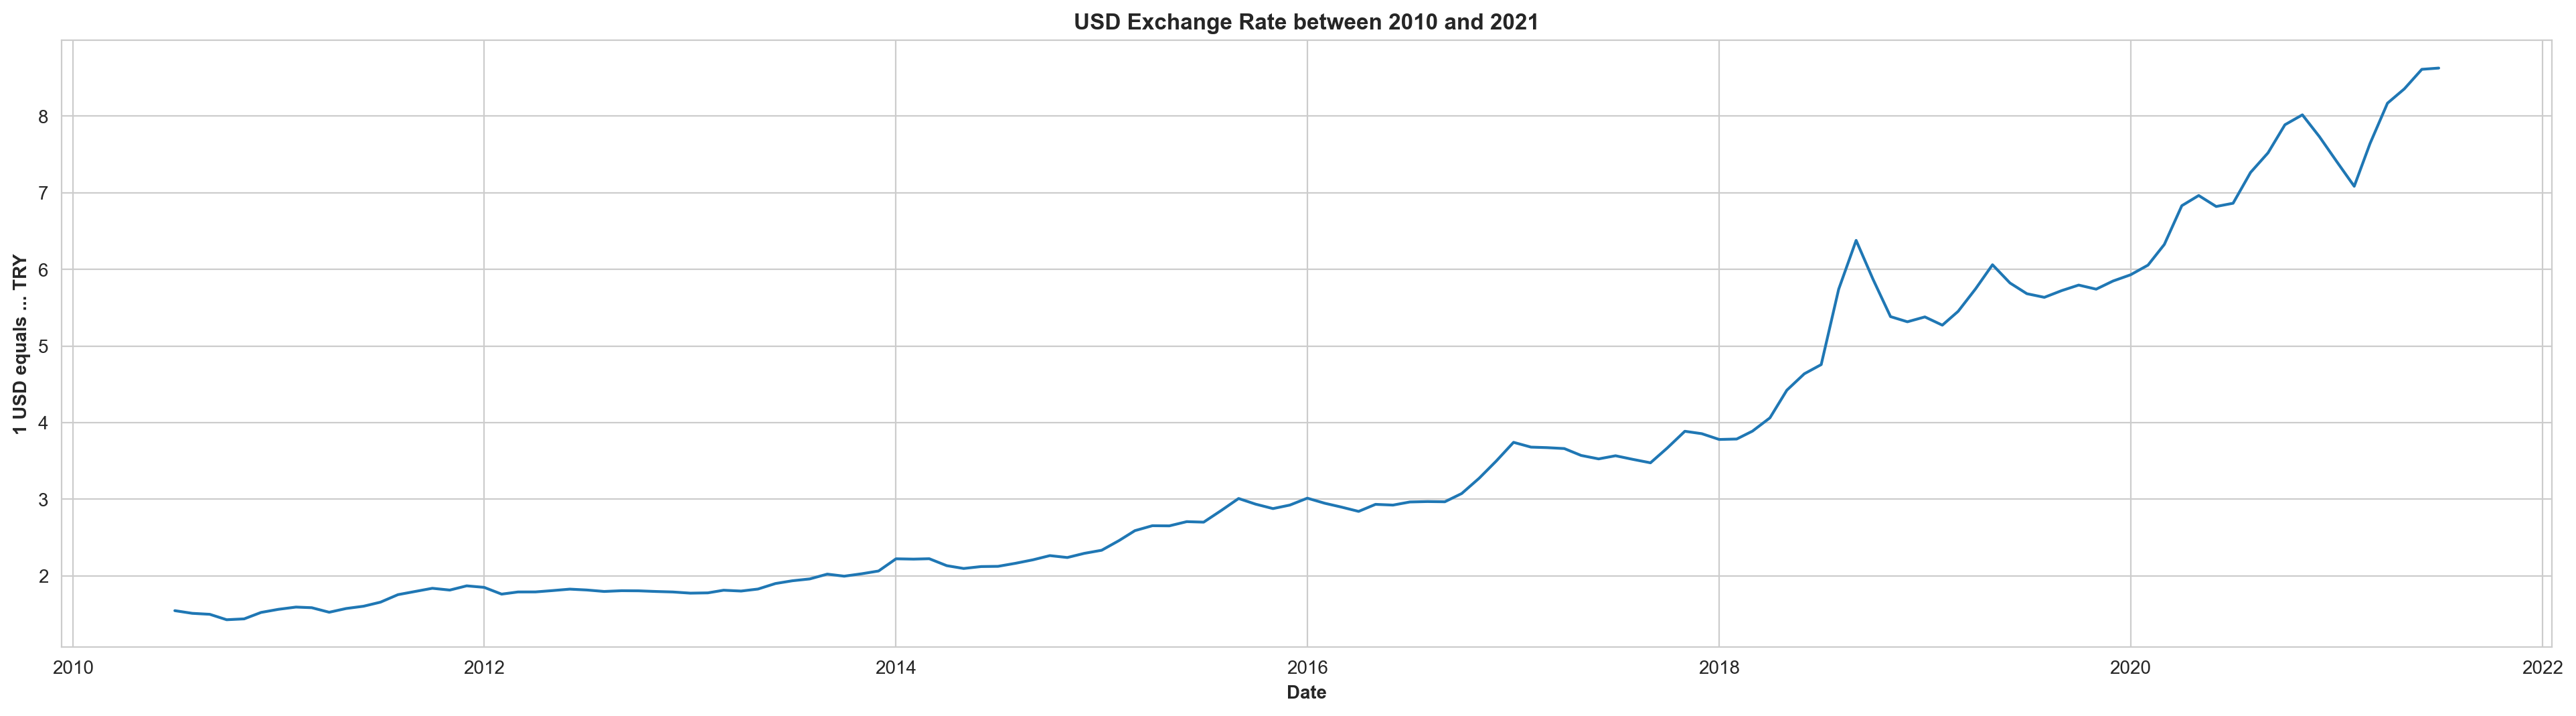

In [16]:
## First of all I want to see USD/TRY conversion over the years. I will use USD Selling. ( When Customer buys USD, we are using sell (from the bank or exchange office). I know backwards logic!)
plt.figure(figsize=(24,6),dpi=200)
sns.lineplot(data=df,x='Date',y='USD Selling').set_title("USD Exchange Rate between 2010 and 2021",weight='bold')
plt.xlabel("Date",weight='bold')
plt.ylabel("1 USD equals ... TRY",weight='bold')
#plt.savefig('USD_TRY_conversion.tif')

#### Interest Rates for TRY (2010-2021)

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

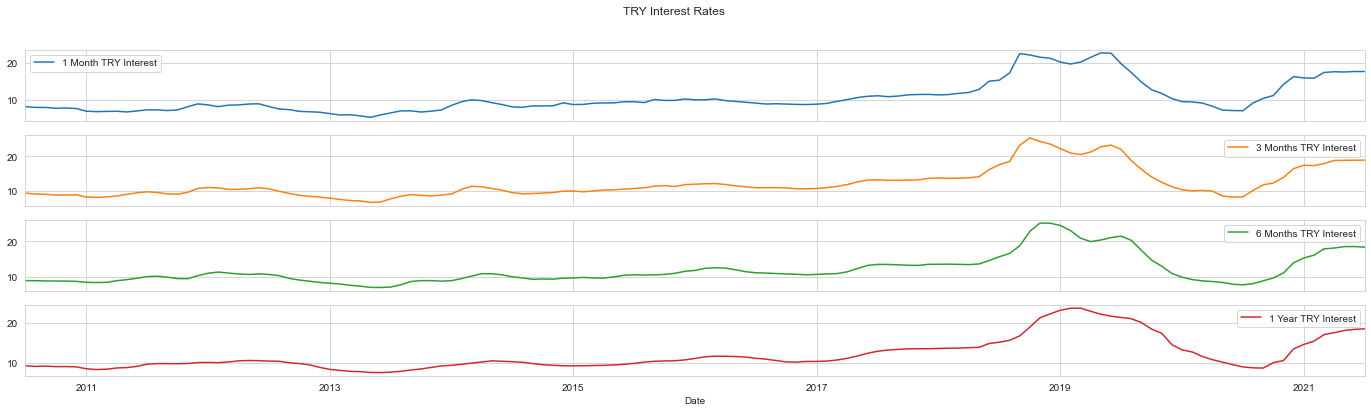

In [17]:
df.plot(x='Date', y=['1 Month TRY Interest','3 Months TRY Interest','6 Months TRY Interest','1 Year TRY Interest'],legend=True, title= 'TRY Interest Rates',figsize=(24,6),subplots=True)


In [18]:
# Above graphs are showing the general trend but I want to format x axis as "date"
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

Text(0, 0.5, 'TRY Interest Rates %')

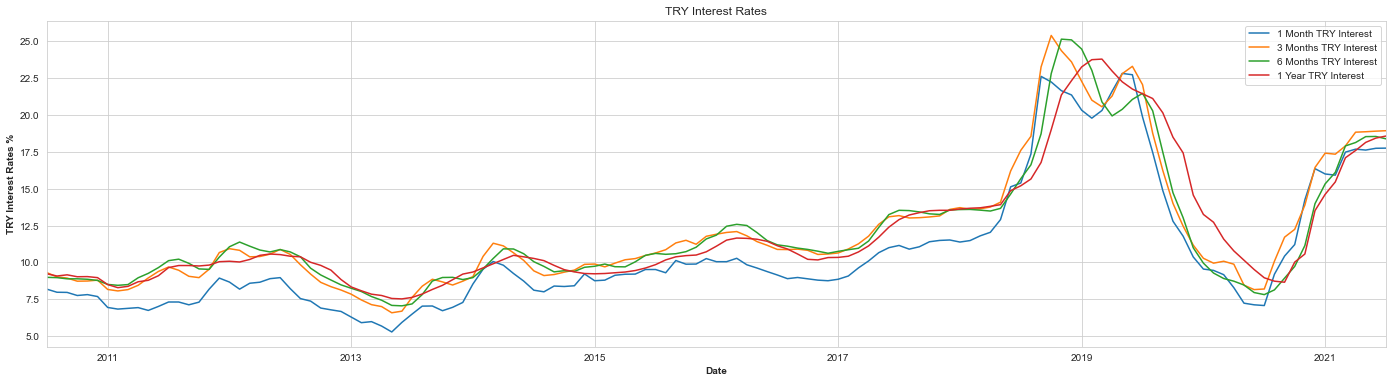

In [19]:
df.plot(x='Date', y=['1 Month TRY Interest','3 Months TRY Interest','6 Months TRY Interest','1 Year TRY Interest'],legend=True, title= 'TRY Interest Rates',figsize=(24,6))
plt.xlabel("Date",weight='bold')
plt.ylabel("TRY Interest Rates %",weight='bold')
#plt.savefig('TRY Interest Rates.jpeg')

##### Fancy Dates: 

fig, ax = plt.subplots()
ax.plot('Date', '1 Month TRY Interest', data=df)  

###### Major ticks every 6 months
fmt_half_year = mdates.MonthLocator(interval=6)
ax.xaxis.set_major_locator(fmt_half_year)

###### Minor ticks every month.
fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)

###### Text in the x axis will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

###### Format the coords message box, i.e. the numbers displayed as the cursor moves across the axes within the interactive GUI.
ax.format_xdata = mdates.DateFormatter('%Y-%m')
ax.grid(True)

###### Rotates and right aligns the x labels, and moves the bottom of the axes up to make room for them.
fig.autofmt_xdate()
fig.figsize=(24,8)

plt.show()

#### Interest Rates for USD (2010-2021)

Text(0, 0.5, 'USD Interest Rates %')

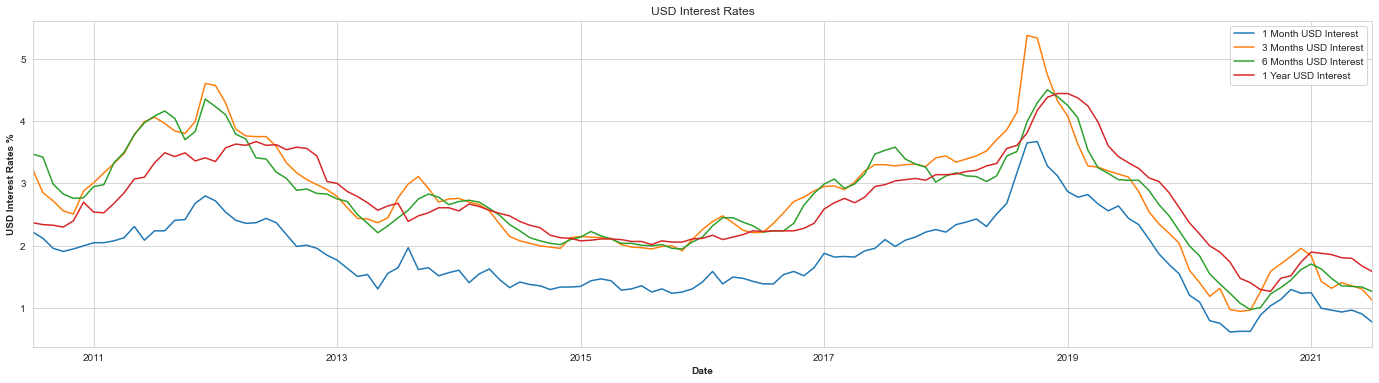

In [20]:
df.plot(x="Date",y=['1 Month USD Interest','3 Months USD Interest','6 Months USD Interest','1 Year USD Interest'],figsize=(24,6),legend=True,title="USD Interest Rates")
plt.xlabel("Date",weight='bold')
plt.ylabel("USD Interest Rates %",weight='bold')
#plt.savefig('USD Interest Rates.jpeg')

## DATA ANALYSIS AND ANSWERING QUESTIONS:

### Q1: EXCHANGE MY MONEY IN 2010 FROM USD TO TRY: 
IF I WOULD EXCHANGED MY 100000 USD TO 'TRY' AND PUT 'TRY INTEREST'. COULD I HAVE MORE MONEY IN THE END? 

In [21]:
# First of all, based on the dataset, if I could keep my start-up money($100000)and exchange in August 2021 how much TRY would I have? 
len = df.shape[0]
len

133

In [22]:
tl_total_2021 = round(100000*df['USD Buying'][len-1],2)
tl_total_2021

861294.12

In [23]:
## if I exchange my $100000 in 2010.
tl_total_2010 = round(100000* df["USD Buying"][0],2)
tl_total_2010

153631.36

**The Compound Interest Formula**
The compound interest formula finds principal plus interest.

**A = P(1 + r/n)^nt**

In the formula

- A = Accrued amount (principal + interest)
- P = Principal amount
- r = Annual nominal interest rate as a decimal
- R = Annual nominal interest rate as a percent
- r = R/100
- n = number of compounding periods per unit of time
- t = time in decimal years; e.g., 6 months is calculated as 0.5 years. Divide your partial year number of months by 12 to get the decimal years.
- I = Interest amount

Because of the constant changing interest rates, people are investing their money in short terms in Turkey. 
So, if we simplify the formula for finding the interest, it will be like following:

**I = (P/100) * (R/12) * months**

In [24]:
def interest(P,R,months):
    return (P/100)*(R/12)*months

I want to create a function which I can use for creating individual dataframes based on the interest rate. 

In [25]:
def interest_df(P,R,month,original_df,conversion):
    term = original_df.shape[0]
    i = 0
    
    monthly_I = []
    monthly_t = []
    monthly_P = []
    if conversion == 'USD':
        conversion_array = []

    new_principal=P

    while i < term:
        int_monthly = interest(new_principal,R[i],month)
        int_after_tax = round((int_monthly*0.8),2)
        monthly_I.append(int_after_tax)
        new_principal = new_principal + int_after_tax
        monthly_P.append(new_principal)
        monthly_t.append(df['Date'][i]) 
        if conversion == "USD":
            conversion_array.append(round(new_principal*original_df['USD Buying'][i],2))
        i = i+month
    
    if conversion == 'TRY':   
        data_try = {"Date": monthly_t,"Interest" : monthly_I,"Principal": monthly_P }     
        new_try_df = pd.DataFrame(data_try)
    elif conversion == 'USD' :
        data_usd = {"Date": monthly_t,"Interest" : monthly_I,"Principal": monthly_P, "Return in TRY": conversion_array }     
        new_usd_df = pd.DataFrame(data_usd)

    if conversion == "TRY":
        return new_try_df
    else:
        return new_usd_df

### TURKISH LIRA INTERESTS

#### Monthly TRY Interest
Let's assume I had $100000 in July 2010 and I converted my USD to TRY and put monthly interest until August 2021. (every month interest is adding to my principal.) How much money I would have in the end(July 2021) ?

In [26]:
df_one_month_TRY = interest_df(tl_total_2010, df["1 Month TRY Interest"],1,df,"TRY")

In [27]:
df_one_month_TRY.describe()

,Interest,Principal
count,133.000000,133.000000
mean,1802.599098,238143.072632
std,1164.569038,67791.205916
min,641.680000,154470.190000
25%,911.470000,181951.790000
50%,1374.740000,219601.100000
75%,2129.860000,282947.330000
max,4723.950000,393377.040000


In [28]:
df_one_month_TRY['Date'] = df_one_month_TRY["Date"].dt.date

In [29]:
## End of August 2021, I would have following amount on my account, if I exchange my money to Turkish Lira and put on a monthly interest
TRY_monthly_total = round(df_one_month_TRY["Principal"].max(),2)
TRY_monthly_total

393377.04

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132]),
 [Text(0, 0, '2010-07-01'),
  Text(1, 0, '2010-08-01'),
  Text(2, 0, '2010-09-01'),
  Text(3, 0, '2010-10-01'),
  Text(4, 0, '2010-11-01'),
  Text(5, 0, '2010-12-01'),
  Text(6, 0, '2011-01-01'),
  Text(7, 0, '2011-02-01'),
  Text(8, 0, '2011-03

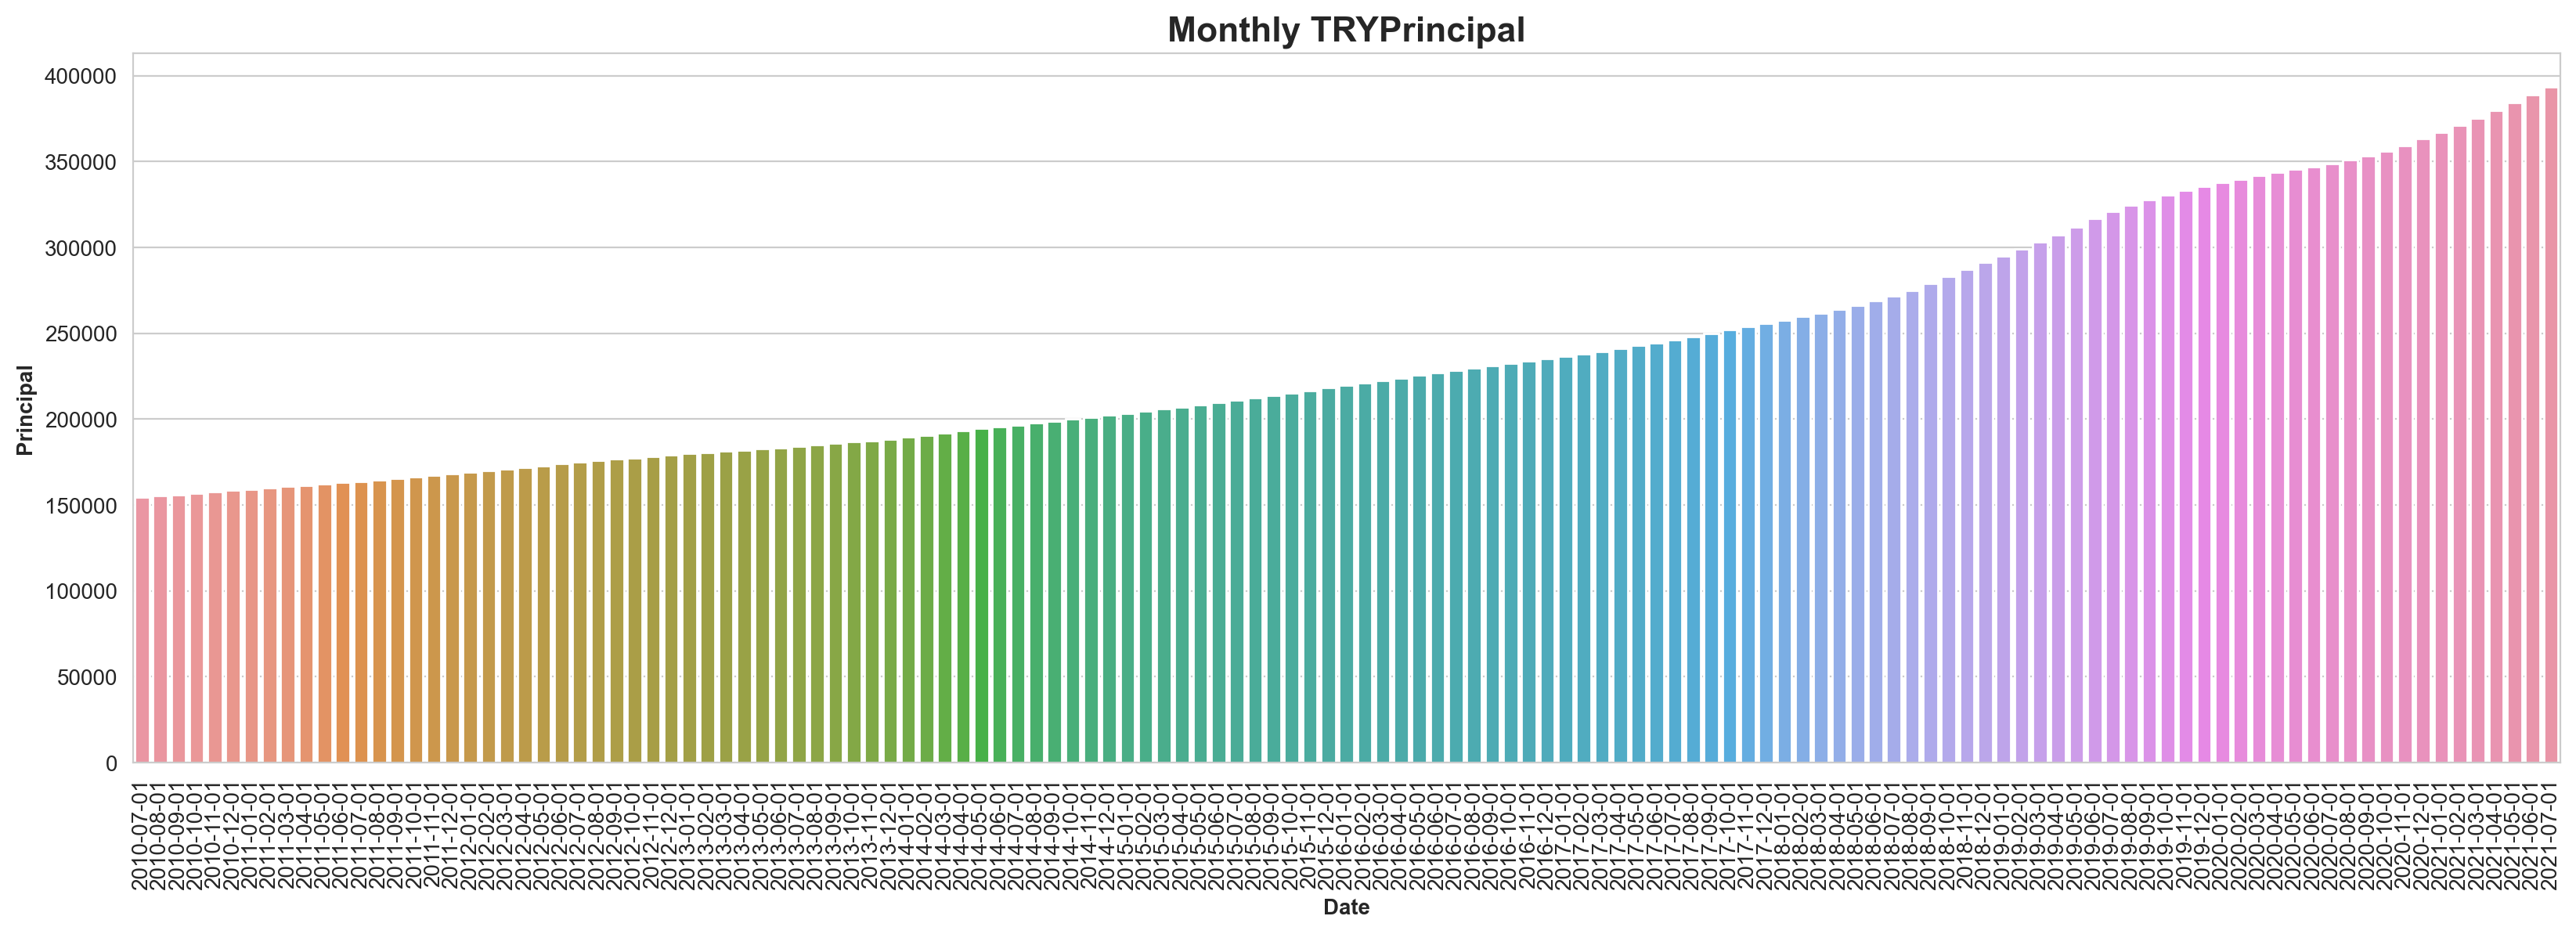

In [30]:
plt.figure(figsize=(20,6),dpi=200)
sns.barplot(data=df_one_month_TRY,x="Date",y="Principal")
plt.title('Monthly TRYPrincipal',weight='bold',fontsize=16)    
plt.xlabel("Date",weight='bold')
plt.ylabel("Principal",weight='bold')
plt.xticks(rotation=90)

#### 3 Monthly TRY Interest
Let's assume I had $100000 in July 2010 and I converted my USD to TRY and put 3 monthly interest until August 2021. (every three months interest is adding to my principal.) How much money I would have in the end(August 2021) ?

In [31]:
df_three_month_TRY = interest_df(tl_total_2010, df["3 Months TRY Interest"],3,df, "TRY")

In [32]:
df_three_month_TRY

,Date,Interest,Principal
0,2010-07-01,2860.62,156491.98
1,2010-10-01,2732.35,159224.33
2,2011-01-01,2601.73,161826.06
3,2011-04-01,2734.86,164560.92
4,2011-07-01,3189.19,167750.11
5,2011-10-01,3009.44,170759.55
6,2012-01-01,3732.80,174492.35
7,2012-04-01,3629.44,178121.79
8,2012-07-01,3754.81,181876.60
9,2012-10-01,3146.47,185023.07


In [33]:
df_three_month_TRY['Date'] = df_three_month_TRY["Date"].dt.date

In [34]:
## End of August 2021, I would have following amount on my account, if I exchange my money to Turkish Lira and put on 3 monthly interest
TRY_three_monthly_total = round(df_three_month_TRY["Principal"].max(),2)
TRY_three_monthly_total

451167.61

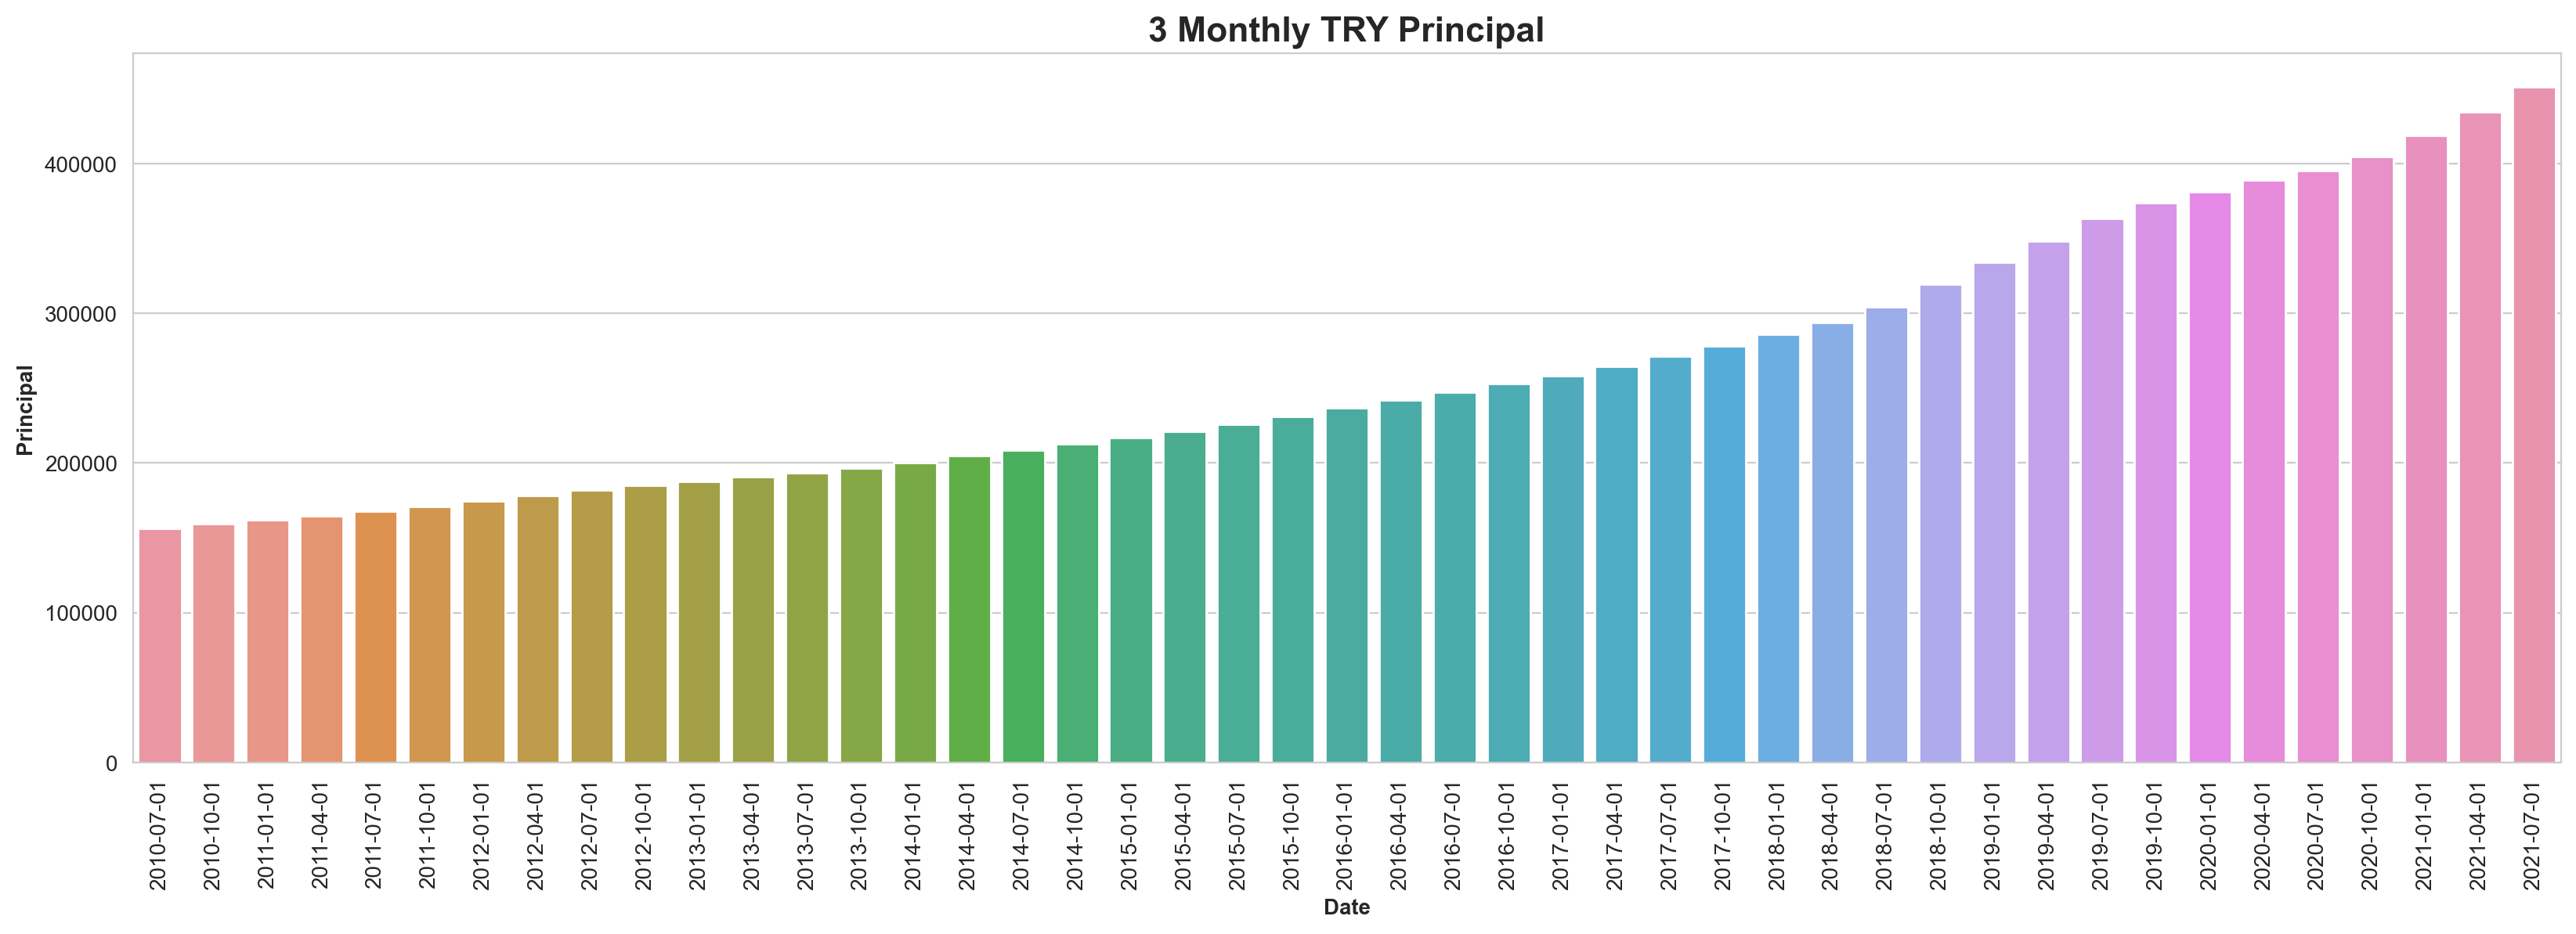

In [35]:
plt.figure(figsize=(20,6),dpi=200)
ax = sns.barplot(data=df_three_month_TRY,x="Date",y="Principal")
plt.title('3 Monthly TRY Principal',weight='bold',fontsize=16)    
plt.xlabel("Date",weight='bold')
plt.ylabel("Principal",weight='bold')
plt.xticks(rotation=90)

#for p in ax.patches:
#    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=10)
plt.show()

#### 6 Monthly TRY Interest
Let's assume I had $100000 in July 2010 and I converted my USD to TRY and put 6 monthly interest until August 2021. (every three months interest is adding to my principal.) How much money I would have in the end(August 2021) ?

In [36]:
df_six_month_TRY = interest_df(tl_total_2010, df["6 Months TRY Interest"],6,df, "TRY")

In [37]:
df_six_month_TRY['Date'] = df_six_month_TRY["Date"].dt.date

In [38]:
df_six_month_TRY

,Date,Interest,Principal
0,2010-07-01,5524.58,159155.94
1,2011-01-01,5417.67,164573.61
2,2011-07-01,6661.94,171235.55
3,2012-01-01,7575.46,178811.01
4,2012-07-01,7660.26,186471.27
5,2013-01-01,6153.55,192624.82
6,2013-07-01,5539.89,198164.71
7,2014-01-01,7110.15,205274.86
8,2014-07-01,8252.05,213526.91
9,2015-01-01,8319.01,221845.92


In [39]:
## End of August 2021, I would have following amount on my account, if I exchange my money to Turkish Lira and put on 6 monthly interest
TRY_six_monthly_total = df_six_month_TRY["Principal"].max()
TRY_six_monthly_total

453946.12

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 [Text(0, 0, '2010-07-01'),
  Text(1, 0, '2011-01-01'),
  Text(2, 0, '2011-07-01'),
  Text(3, 0, '2012-01-01'),
  Text(4, 0, '2012-07-01'),
  Text(5, 0, '2013-01-01'),
  Text(6, 0, '2013-07-01'),
  Text(7, 0, '2014-01-01'),
  Text(8, 0, '2014-07-01'),
  Text(9, 0, '2015-01-01'),
  Text(10, 0, '2015-07-01'),
  Text(11, 0, '2016-01-01'),
  Text(12, 0, '2016-07-01'),
  Text(13, 0, '2017-01-01'),
  Text(14, 0, '2017-07-01'),
  Text(15, 0, '2018-01-01'),
  Text(16, 0, '2018-07-01'),
  Text(17, 0, '2019-01-01'),
  Text(18, 0, '2019-07-01'),
  Text(19, 0, '2020-01-01'),
  Text(20, 0, '2020-07-01'),
  Text(21, 0, '2021-01-01'),
  Text(22, 0, '2021-07-01')])

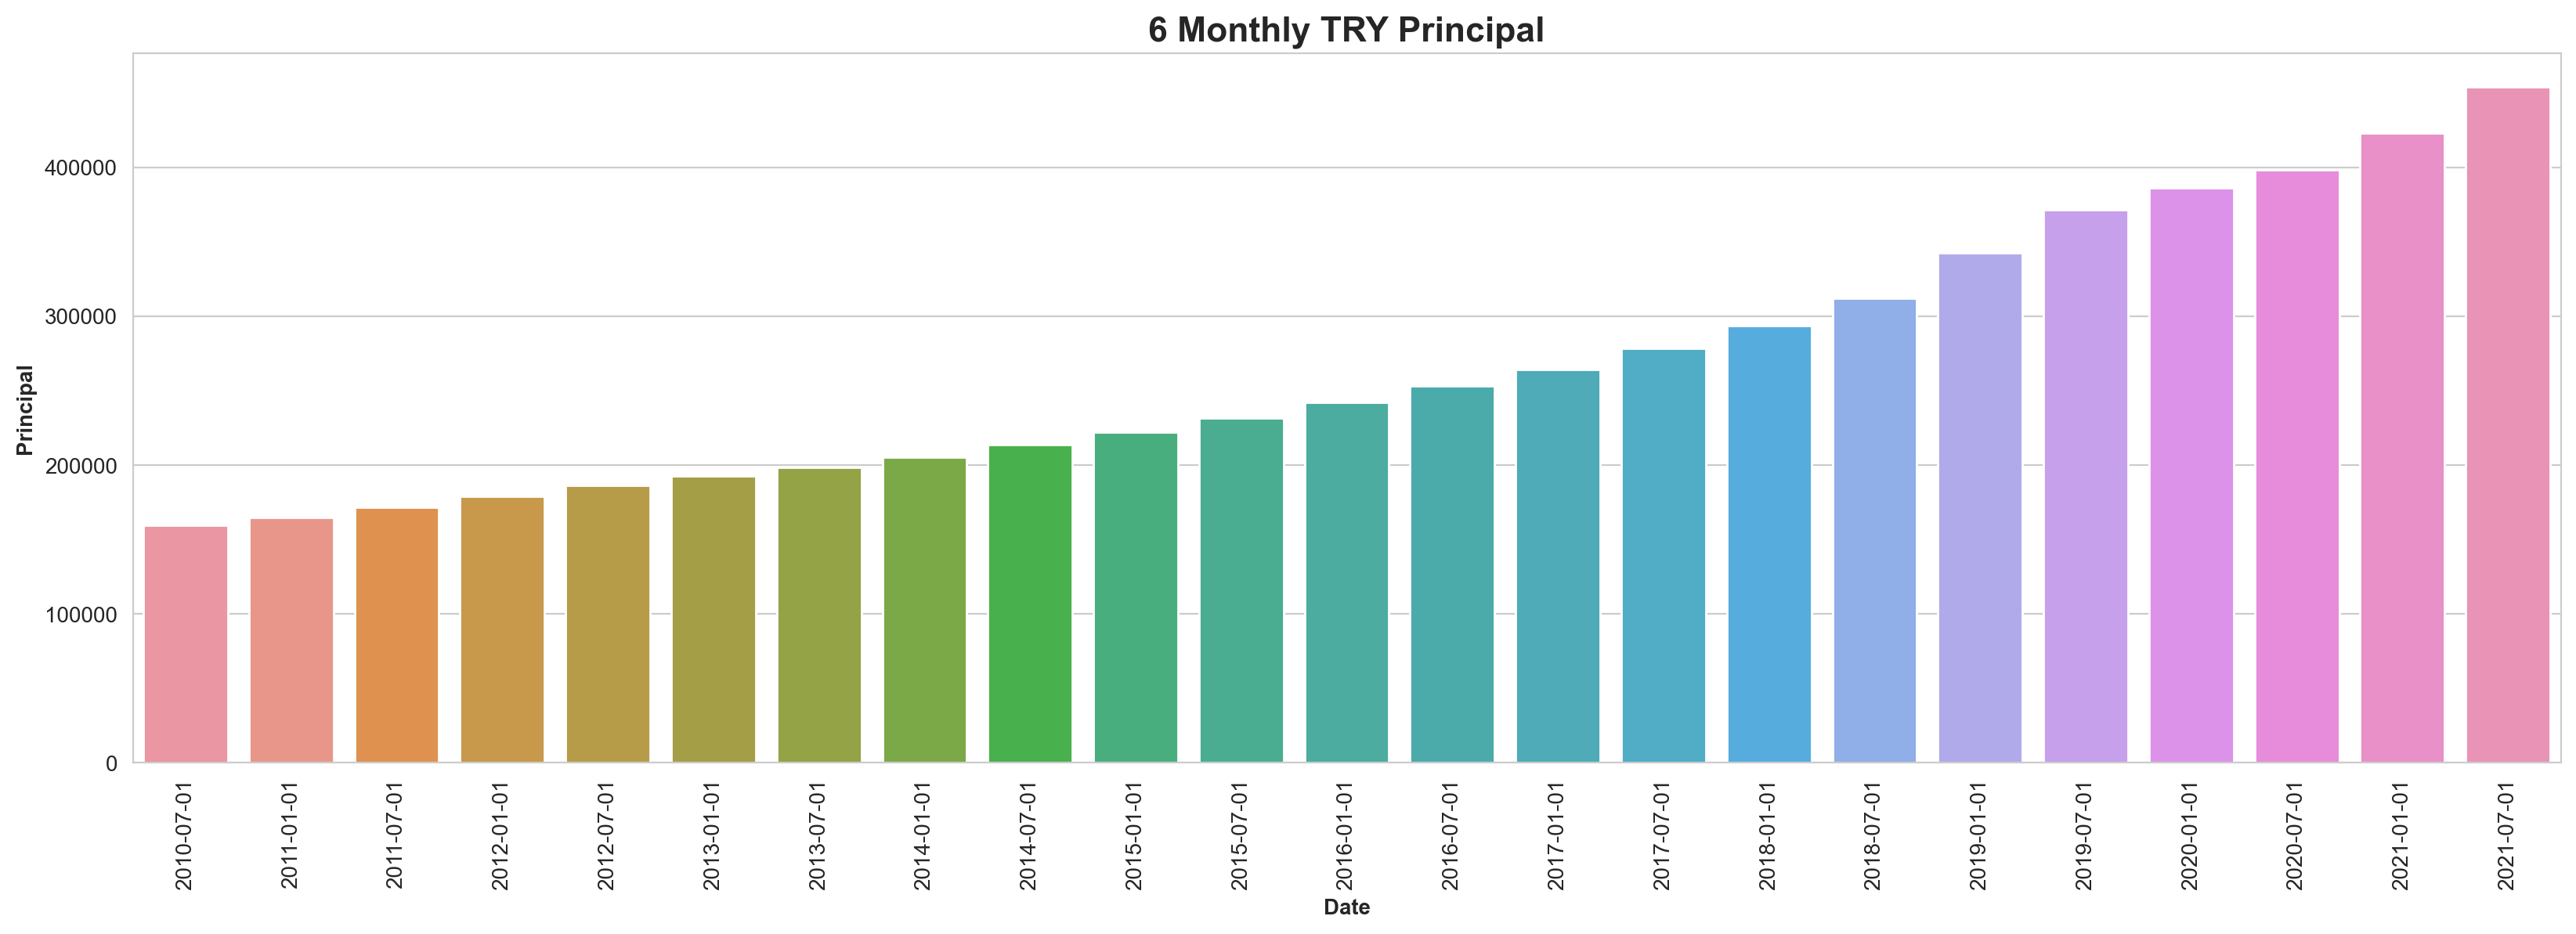

In [40]:
plt.figure(figsize=(20,6),dpi=200)
ax = sns.barplot(data=df_six_month_TRY,x="Date",y="Principal")
plt.title('6 Monthly TRY Principal',weight='bold',fontsize=16)    
plt.xlabel("Date",weight='bold')
plt.ylabel("Principal",weight='bold')
plt.xticks(rotation=90)

#### 1 Year TRY Interest
Let's assume I had $100000 in July 2010 and I converted my USD to TRY and put annual interest until August 2021. (every three months interest is adding to my principal.) How much money I would have in the end(August 2021) ?

In [41]:
df_one_year_TRY = interest_df(tl_total_2010, df["1 Year TRY Interest"],12,df, "TRY")

In [42]:
df_one_year_TRY['Date'] = df_one_year_TRY["Date"].dt.date

In [43]:
df_one_year_TRY

,Date,Interest,Principal
0,2010-07-01,11344.14,164975.50
1,2011-07-01,12736.11,177711.61
2,2012-07-01,14814.04,192525.65
3,2013-07-01,11751.77,204277.42
4,2014-07-01,16783.43,221060.85
5,2015-07-01,17419.59,238480.44
6,2016-07-01,21234.30,259714.74
7,2017-07-01,26802.56,286517.30
8,2018-07-01,34817.58,321334.88
9,2019-07-01,55063.95,376398.83


In [44]:
## End of August 2021, I would have following amount on my account, if I exchange my money to Turkish Lira and put on annual interest
TRY_one_year_total = round(df_one_year_TRY["Principal"].max(),2)
TRY_one_year_total

463272.83

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '2010-07-01'),
  Text(1, 0, '2011-07-01'),
  Text(2, 0, '2012-07-01'),
  Text(3, 0, '2013-07-01'),
  Text(4, 0, '2014-07-01'),
  Text(5, 0, '2015-07-01'),
  Text(6, 0, '2016-07-01'),
  Text(7, 0, '2017-07-01'),
  Text(8, 0, '2018-07-01'),
  Text(9, 0, '2019-07-01'),
  Text(10, 0, '2020-07-01'),
  Text(11, 0, '2021-07-01')])

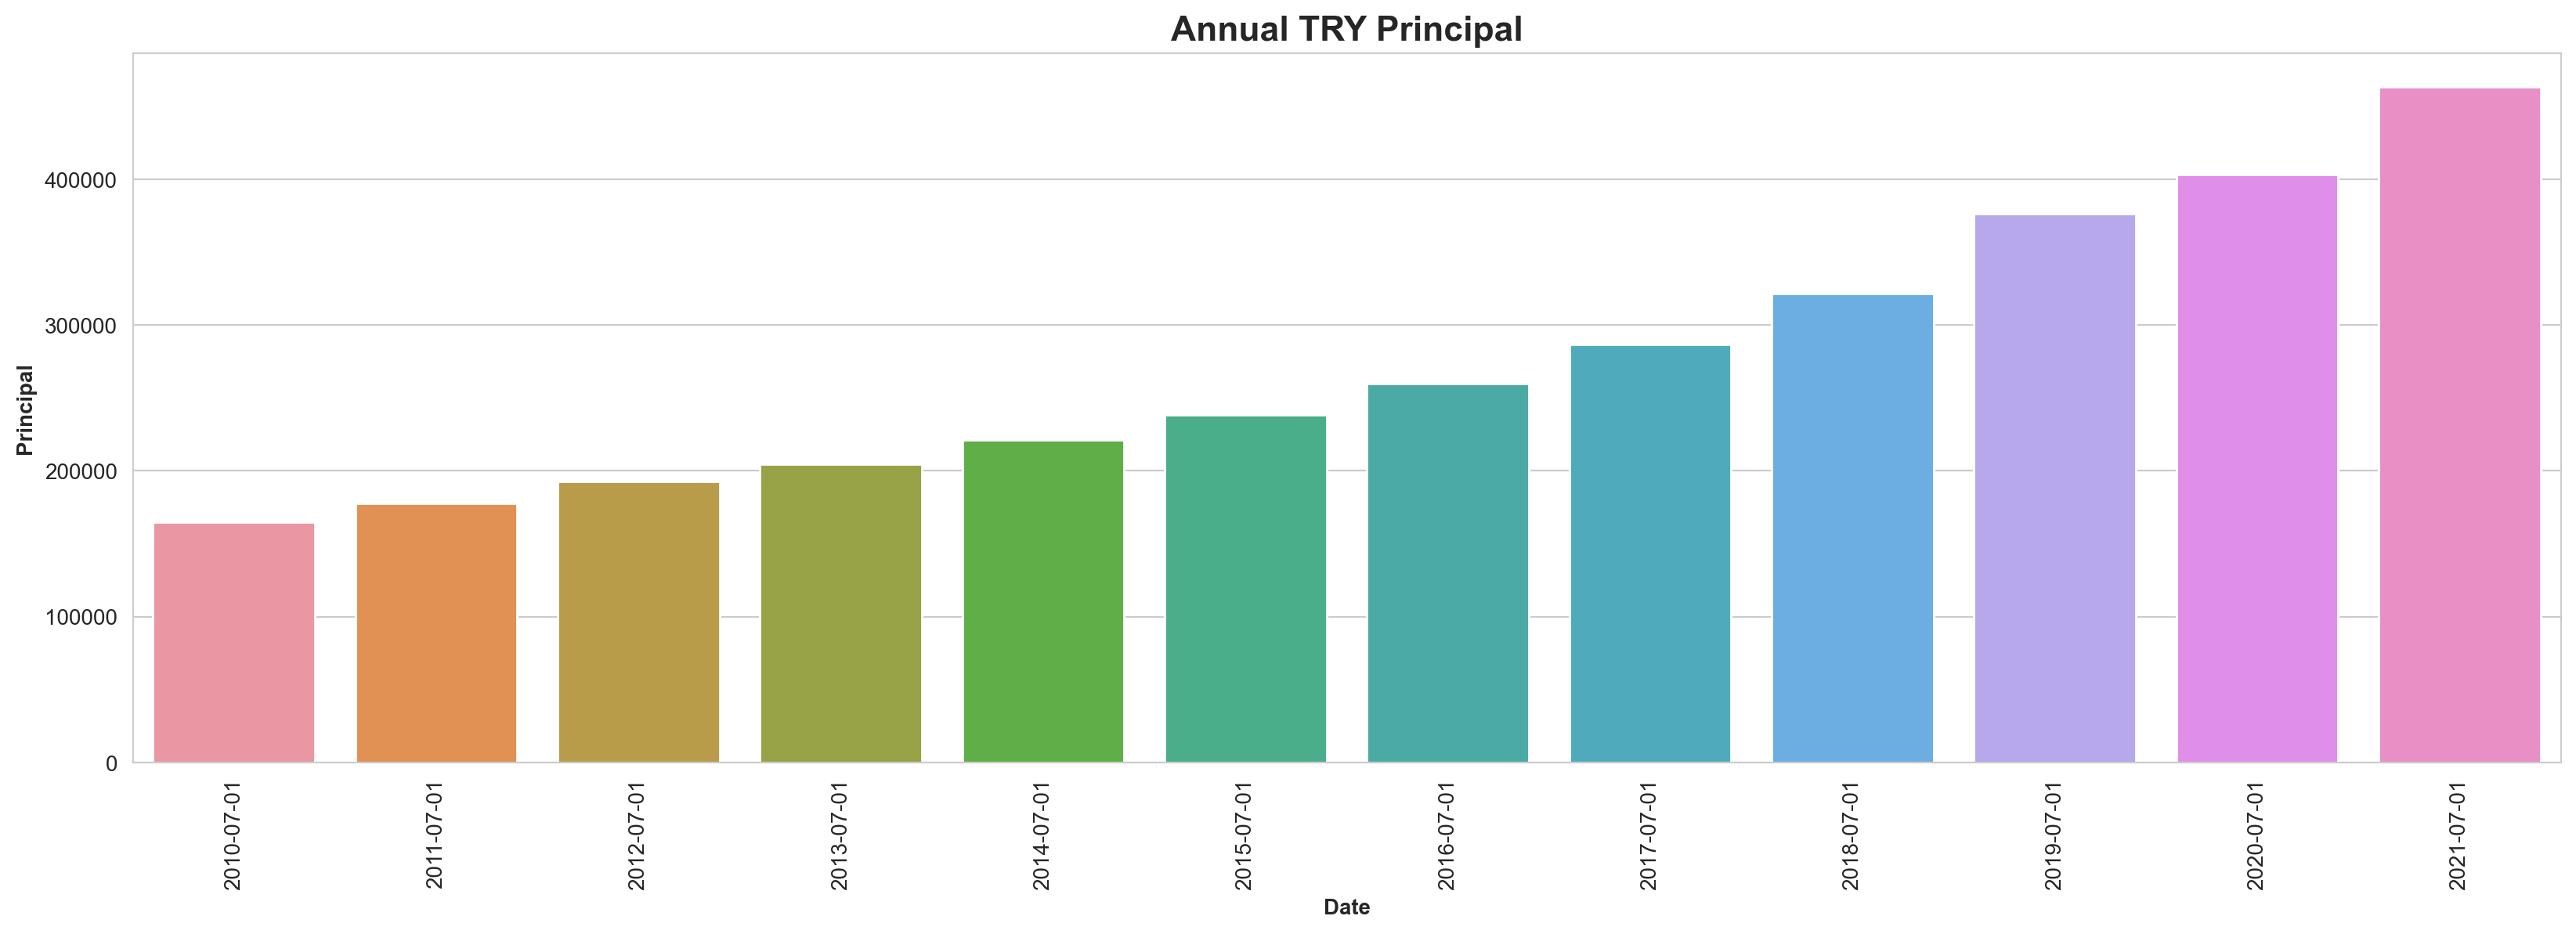

In [45]:
plt.figure(figsize=(20,6),dpi=200)
sns.barplot(data=df_one_year_TRY,x="Date",y="Principal")
plt.title('Annual TRY Principal',weight='bold',fontsize=16)    
plt.xlabel("Date",weight='bold')
plt.ylabel("Principal",weight='bold')
plt.xticks(rotation=90)

### USD INTERESTS

### Q2: KEEP MY MONEY IN 2010 IN USD: 
IF I KEPT MY 100000 USD AND PUT 'USD INTEREST'. COULD I HAVE MORE MONEY IN THE END? 

#### Monthly USD Interest
Let's assume I had $100000 in July 2010 and I kept my USD and put monthly interest until August 2021. (every month interest is adding to my principal.) How much money I would have in the end(August 2021)? (For comparasion, I will convert to TRY in the end of the period)

In [46]:
df_one_month_USD = interest_df(100000, df["1 Month USD Interest"],1,df,"USD")

In [47]:
df_one_month_USD

,Date,Interest,Principal,Return in TRY
0,2010-07-01,148.00,100148.00,153858.74
1,2010-08-01,141.54,100289.54,150597.64
2,2010-09-01,131.04,100420.58,149517.71
3,2010-10-01,127.87,100548.45,142623.95
4,2010-11-01,130.71,100679.16,143923.66
...,...,...,...,...
128,2021-03-01,75.73,117178.19,893862.74
129,2021-04-01,73.43,117251.62,956189.75
130,2021-05-01,75.82,117327.44,978774.84
131,2021-06-01,71.18,117398.62,1009238.58


In [48]:
convert_USD_one_month_total = df_one_month_USD['Return in TRY'][len-1]
convert_USD_one_month_total

1011673.23

#### 3 Monthly USD Interest
Let's assume I had $100000 in July 2010 and I kept my USD and put 3 monthly interest until July 2021. (every 3 months interest is adding to my principal.) How much money I would have in the end(July 2021)? (For comparasion, I will convert to TRY in the end of the period)

In [49]:
df_three_month_USD = interest_df(100000, df["3 Months USD Interest"],3,df,"USD")

In [50]:
df_three_month_USD

,Date,Interest,Principal,Return in TRY
0,2010-07-01,644.00,100644.00,154620.75
1,2010-10-01,515.30,101159.30,143490.42
2,2011-01-01,608.98,101768.28,158129.49
3,2011-04-01,708.31,102476.59,155315.47
4,2011-07-01,832.11,103308.70,170119.91
5,2011-10-01,785.15,104093.85,190187.89
6,2012-01-01,951.42,105045.27,193171.57
7,2012-04-01,789.94,105835.21,188369.74
8,2012-07-01,759.90,106595.11,192392.06
9,2012-10-01,652.36,107247.47,192416.98


In [51]:
convert_USD_three_month_total = df_three_month_USD['Return in TRY'].max()
convert_USD_three_month_total

1104264.33

#### 6 Monthly USD Interest
Let's assume I had $100000 in July 2010 and I kept my USD and put 6 monthly interest until July 2021. (every 6 months interest is adding to my principal.) How much money I would have in the end(July 2021)? (For comparasion, I will convert to TRY in the end of the period)

In [52]:
df_six_month_USD = interest_df(100000, df["6 Months USD Interest"],6,df,"USD")

In [53]:
df_six_month_USD

,Date,Interest,Principal,Return in TRY
0,2010-07-01,1388.00,101388.00,155763.77
1,2011-01-01,1196.38,102584.38,159397.56
2,2011-07-01,1674.18,104258.56,171684.06
3,2012-01-01,1764.05,106022.61,194968.83
4,2012-07-01,1348.61,107371.22,193792.85
5,2013-01-01,1181.08,108552.30,191470.96
6,2013-07-01,1063.81,109616.11,211611.99
7,2014-01-01,1188.24,110804.35,245635.11
8,2014-07-01,992.81,111797.16,236861.85
9,2015-01-01,956.98,112754.14,262530.30


In [54]:
convert_USD_six_month_total =  df_six_month_USD['Return in TRY'].max()
convert_USD_six_month_total

1106076.92

### Finally!
#### Annual USD Interest
Let's assume I had $100000 in July 2010 and I kept my USD and put annual interest until July 2021. (every year interest is adding to my principal.) How much money I would have in the end(July 2021)? (For comparasion, I will convert to TRY in the end of the period)
In [91]:


In [55]:
df_one_year_USD = interest_df(100000, df["1 Year USD Interest"],12,df,"USD")

In [56]:
df_one_year_USD

,Date,Interest,Principal,Return in TRY
0,2010-07-01,1896.00,101896.00,156544.21
1,2011-07-01,2714.51,104610.51,172263.62
2,2012-07-01,3029.52,107640.03,194278.02
3,2013-07-01,2307.80,109947.83,212252.37
4,2014-07-01,2102.20,112050.03,237397.60
5,2015-07-01,1855.55,113905.58,306930.49
6,2016-07-01,2032.08,115937.66,342892.07
7,2017-07-01,2763.95,118701.61,422561.90
8,2018-07-01,3380.62,122082.23,579647.54
9,2019-07-01,3252.27,125334.50,710919.50


In [57]:
convert_USD_year_total = df_one_year_USD['Return in TRY'].max()
convert_USD_year_total

1105561.52

## Data Visualization - DF Comparison :

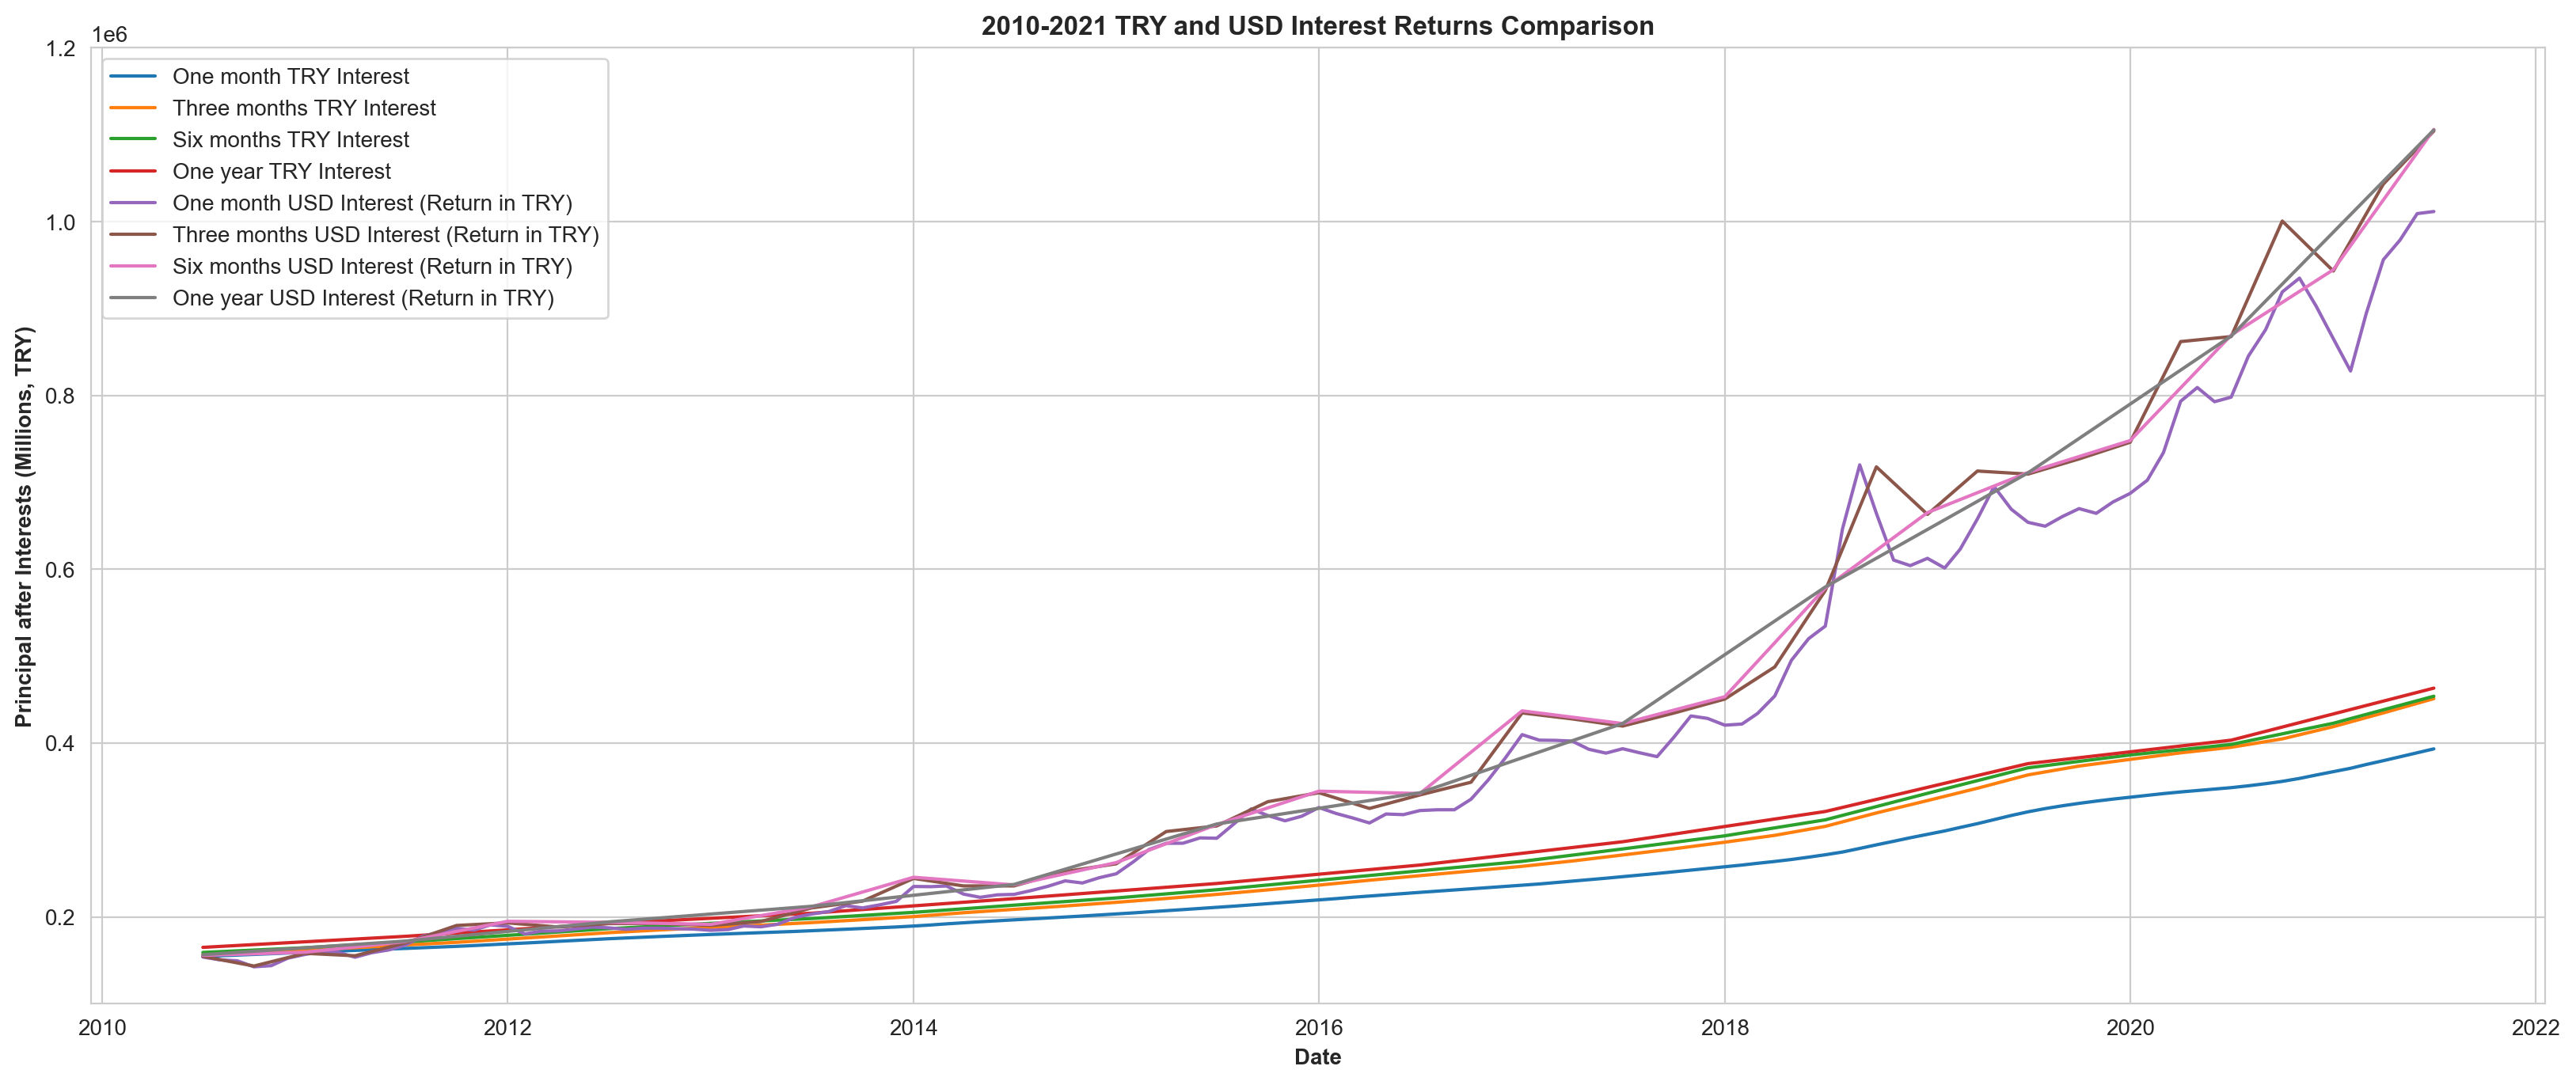

In [58]:
fig = plt.figure(figsize=(20,8),dpi=200)


for frame in [df_one_month_TRY,df_three_month_TRY,df_six_month_TRY,df_one_year_TRY]:
    plt.plot(frame["Date"], frame['Principal'])
    #plt.legend(['One month TRY Interest','Three months TRY Interest','Six months TRY Interest','One year TRY Interest'])
    
for frame in [df_one_month_USD,df_three_month_USD,df_six_month_USD,df_one_year_USD]:
    plt.plot(frame["Date"], frame['Return in TRY'])
    plt.legend(['One month TRY Interest','Three months TRY Interest','Six months TRY Interest','One year TRY Interest','One month USD Interest (Return in TRY)','Three months USD Interest (Return in TRY)','Six months USD Interest (Return in TRY)','One year USD Interest (Return in TRY)'])
    

plt.ylim(100000,1200000) 

plt.xlabel('Date',weight='bold',fontsize=10)
plt.ylabel('Principal after Interests (Millions, TRY)',weight='bold',fontsize=10)
plt.title("2010-2021 TRY and USD Interest Returns Comparison",weight='bold')

#plt.savefig("2010-2021 TRY and USD Interest Returns Comparison.jpeg")
plt.show()

### Q3: COMPARING THE TOTAL PRINCIPAL & INTEREST IN AUGUST 2021 BASED ON PERCENTAGE 

In [59]:
## I already calculated earlier on the notebook converted $100000 in July 2010 and July 2021
print("If we converted our $100000 in July 2010, it would be :",tl_total_2010)
print("If we converted our $100000 in July 2021, it would be :",tl_total_2021)

If we converted our $100000 in July 2010, it would be : 153631.36
If we converted our $100000 in July 2021, it would be : 861294.12


In [60]:
my_index = ['One month TRY Interest','Three months TRY Interest','Six months TRY Interest','One year TRY Interest','One month USD Interest','Three months USD Interest','Six months USD Interest','One year USD Interest']
my_columns = ['Total Money in TRY','Total Money in USD',"Total Interest in TRY","Total Interest in USD", "Difference with Interest in TRY","Total Earning % in TRY", "Total Earning % in USD" ]

In [61]:
df.tail(5)

,Date,1 Month TRY Interest,3 Months TRY Interest,6 Months TRY Interest,1 Year TRY Interest,1 Month USD Interest,3 Months USD Interest,6 Months USD Interest,1 Year USD Interest,USD Buying,USD Selling
128,2021-03-01,17.47,17.89,17.89,17.09,0.97,1.32,1.48,1.86,7.628235,7.641970
129,2021-04-01,17.67,18.82,18.12,17.58,0.94,1.41,1.36,1.81,8.155024,8.169719
130,2021-05-01,17.61,18.85,18.52,18.13,0.97,1.36,1.35,1.80,8.342250,8.357272
131,2021-06-01,17.73,18.89,18.53,18.42,0.91,1.31,1.34,1.68,8.596682,8.612155
132,2021-07-01,17.74,18.92,18.37,18.56,0.78,1.13,1.27,1.59,8.612941,8.628465


In [62]:
## I will make the similar calculations for each df, so making a function will save some time

usd_buying_2021 = df['USD Buying'][len-1]

def result_maker(dframe,currency):
    l = dframe.shape[0]
 
    if currency == 'USD':
        tr_principal = round(dframe['Return in TRY'][l-1],2)
        usd_principal = round(dframe["Principal"][l-1],2)
        tr_interest = round(dframe['Return in TRY'][l-1]-tl_total_2010,2)  
        ## $100000 is our starting point 
        usd_interest = round(dframe["Principal"][l-1] - 100000,2)
        difference_tr = tr_principal - tl_total_2021       
        tr_earning_perc = int(100*((tr_principal-tl_total_2010)/tl_total_2010))
        usd_earning_perc = int(100*((usd_principal-100000)/100000))
        
    if currency=="TRY":
        tr_principal = round(dframe['Principal'][l-1],2)
        usd_principal = round((dframe["Principal"][l-1] / usd_buying_2021),2)
        tr_interest = round(dframe['Principal'][l-1]- tl_total_2010,2)        
        usd_interest = round(usd_principal-100000,2)
        difference_tr = tr_principal - tl_total_2021
        tr_earning_perc = int(100*((tr_principal-tl_total_2010)/tl_total_2010))
        usd_earning_perc = int(100*((usd_principal-100000)/100000))
        
    return [tr_principal,usd_principal,tr_interest,usd_interest,difference_tr,tr_earning_perc,usd_earning_perc]

In [63]:
tr_one_month = result_maker(df_one_month_TRY,"TRY")
tr_one_month

[393377.04, 45672.79, 239745.68, -54327.21, -467917.08, 156, -54]

In [64]:
usd_one_month = result_maker(df_one_month_USD,"USD")
usd_one_month

[1011673.23, 117459.67, 858041.87, 17459.67, 150379.11, 558, 17]

In [65]:
tr_three_month = result_maker(df_three_month_TRY,"TRY")
tr_six_month = result_maker(df_six_month_TRY,"TRY")
tr_one_year = result_maker(df_one_year_TRY,"TRY")
usd_three_month = result_maker(df_three_month_USD,"USD")
usd_six_month = result_maker(df_six_month_USD,"USD")
usd_one_year = result_maker(df_one_year_USD,"USD")

In [66]:
## I need to create/ take the data from each df based on my columns descriptions and create an series.
summary_data = [tr_one_month,tr_three_month,tr_six_month,tr_one_year,usd_one_month,usd_three_month,usd_six_month,usd_one_year]

In [67]:
summary_df = pd.DataFrame(data=summary_data, index=my_index,columns=my_columns)
summary_df

,Total Money in TRY,Total Money in USD,Total Interest in TRY,Total Interest in USD,Difference with Interest in TRY,Total Earning % in TRY,Total Earning % in USD
One month TRY Interest,393377.04,45672.79,239745.68,-54327.21,-467917.08,156,-54
Three months TRY Interest,451167.61,52382.53,297536.25,-47617.47,-410126.51,193,-47
Six months TRY Interest,453946.12,52705.12,300314.76,-47294.88,-407348.00,195,-47
One year TRY Interest,463272.83,53787.99,309641.47,-46212.01,-398021.29,201,-46
One month USD Interest,1011673.23,117459.67,858041.87,17459.67,150379.11,558,17
Three months USD Interest,1104264.33,128209.90,950632.97,28209.90,242970.21,618,28
Six months USD Interest,1106076.92,128420.35,952445.56,28420.35,244782.80,619,28
One year USD Interest,1105561.52,128360.51,951930.16,28360.51,244267.40,619,28


#### Some explanation about column names:
- Total Money in TRY: How much Turkish Lira did we make in end of July 2021 based on our choice of interest.(total sum)

- Total Money in USD: How much United States Dolar did we make in end of July 2021 based on our choice of interest.(total sum)

- Total Interest in TRY: Based on $100000 starting point, how much interest did we earn as TRY.

- Total Interest in USD: Based on $100000 starting point, how much interest did we earn as USD.

- Difference with Interest in TRY: Difference between total money in TRY and conversion of $100000 to TRY in July 2021 

- Total Earning % in TRY: 100*((Total Money in TRY - Original Money in TRY)/Original Money in TRY)

- Total Earning % in USD: 100*((Total Money in USD - 100000)/ 100000)


## Summary Table Visualization

### Graph for Total Money in TRY

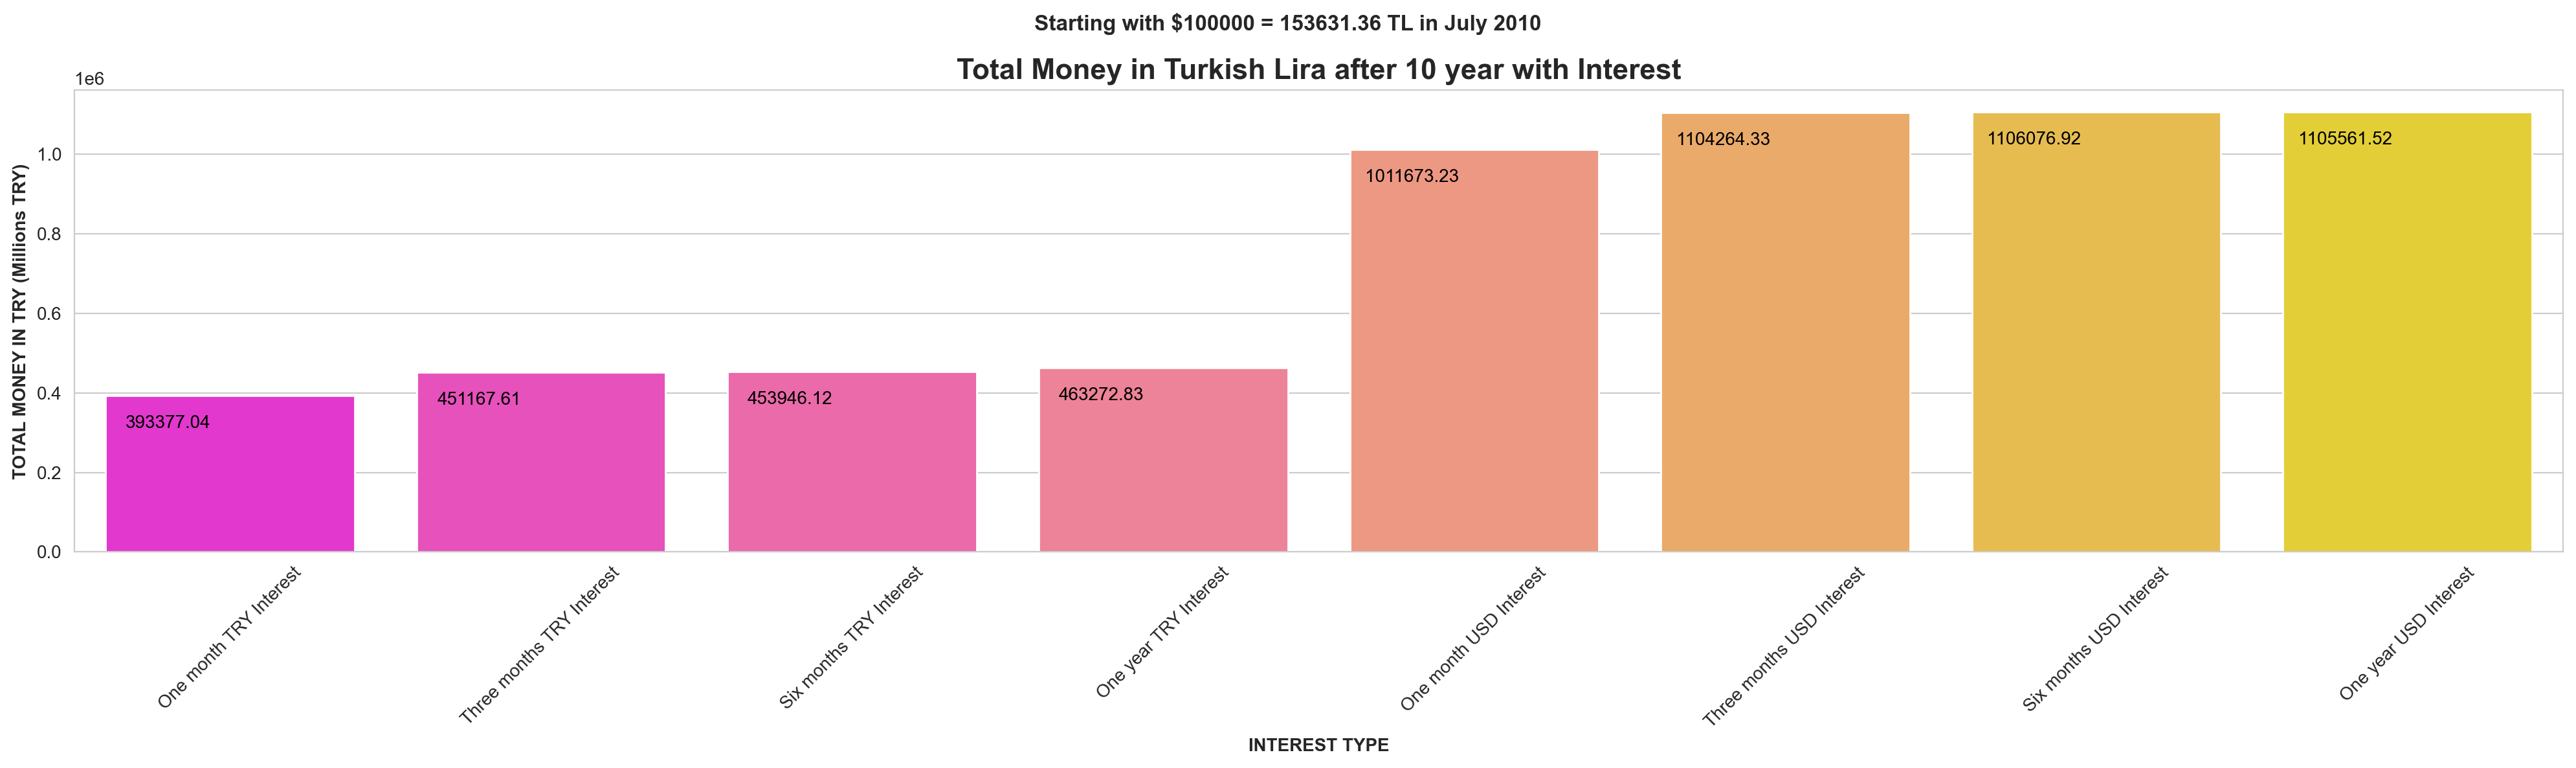

In [68]:
types = summary_df.index
plt.figure(figsize=(20,6),dpi=200)
ax = sns.barplot(data=summary_df,x=types,y='Total Money in TRY',palette="spring")
plt.title('Total Money in Turkish Lira after 10 year with Interest',weight='bold',fontsize=16)    
plt.suptitle('Starting with $100000 = 153631.36 TL in July 2010',weight='bold',fontsize=12)
plt.xlabel('INTEREST TYPE',weight='bold')
plt.ylabel('TOTAL MONEY IN TRY (Millions TRY)',weight='bold')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=10)

plt.tight_layout()
#plt.savefig("ttl_money_in_tl.jpeg",dpi=200)
plt.show()

### Graph for Total Money in USD

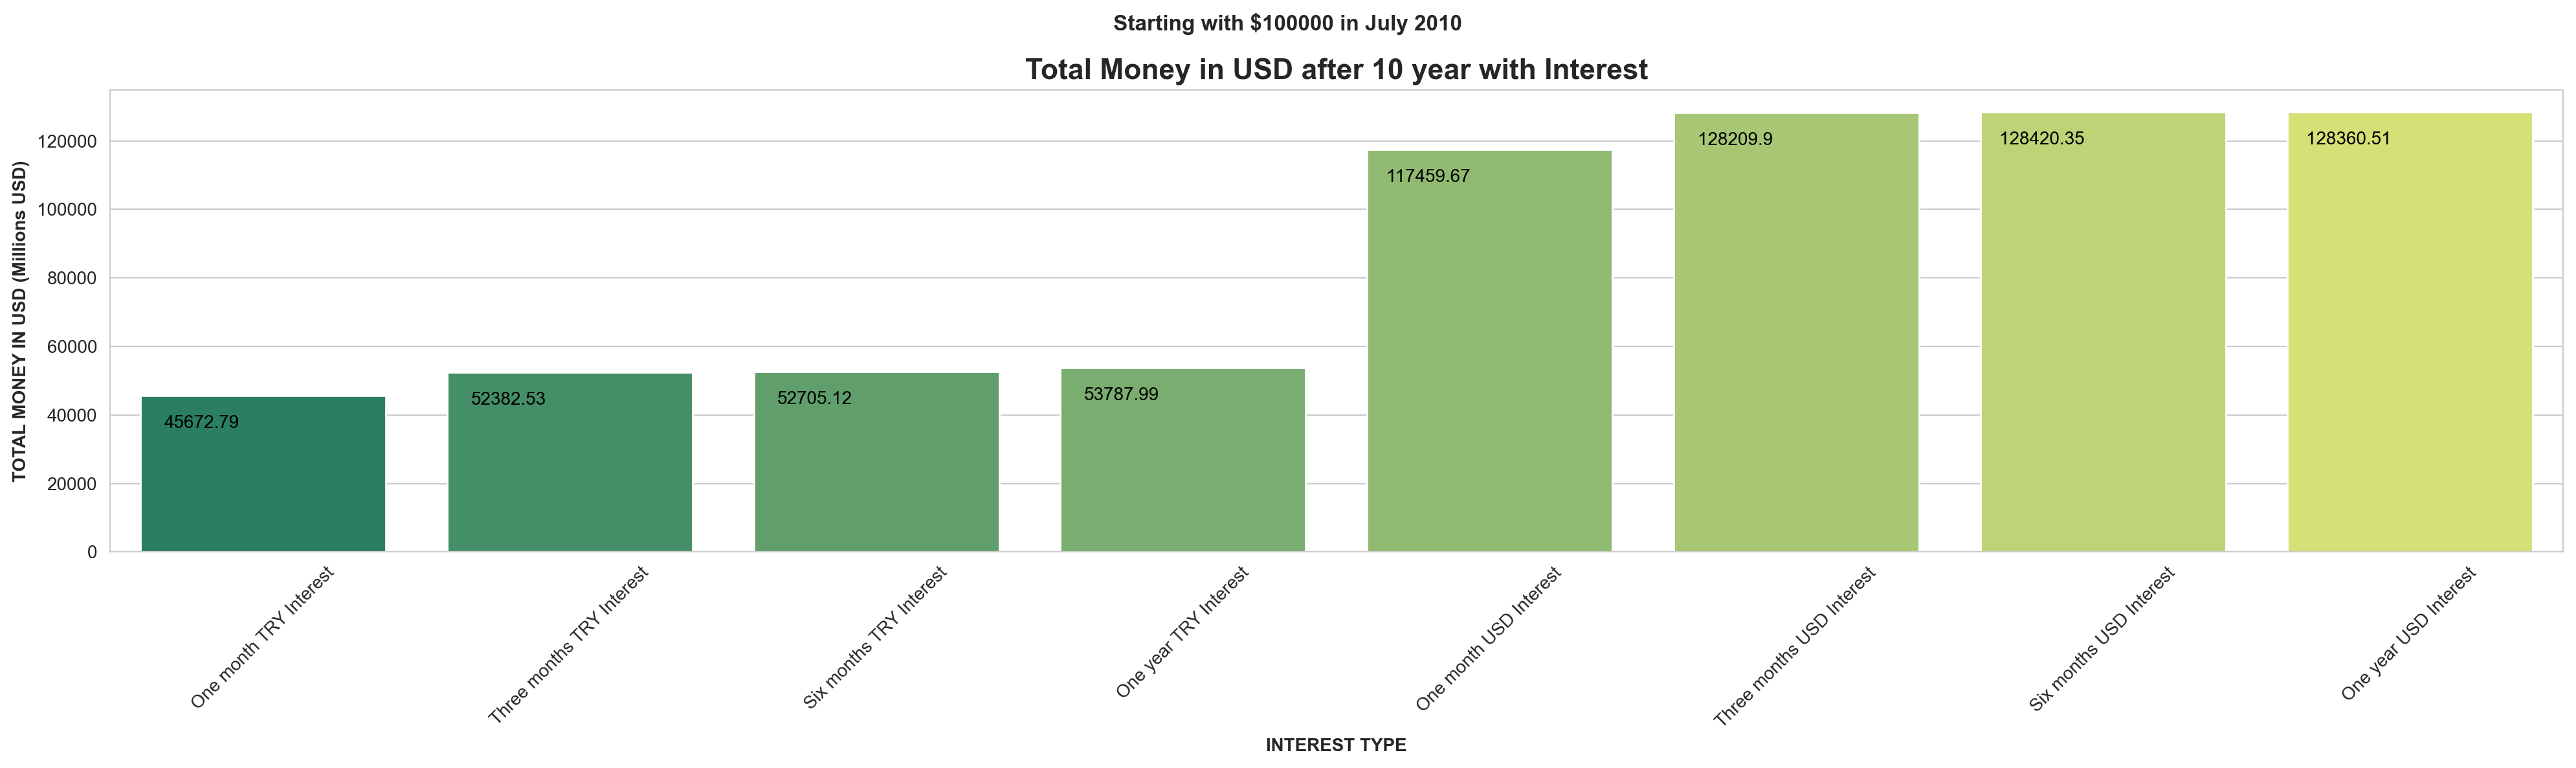

In [69]:
types = summary_df.index
plt.figure(figsize=(20,6),dpi=200)
ax = sns.barplot(data=summary_df,x=types,y='Total Money in USD',palette="summer")
plt.title('Total Money in USD after 10 year with Interest',weight='bold',fontsize=16)    
plt.suptitle('Starting with $100000 in July 2010',weight='bold',fontsize=12)
plt.xlabel('INTEREST TYPE',weight='bold')
plt.ylabel('TOTAL MONEY IN USD (Millions USD)',weight='bold')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=10)

plt.tight_layout()
#plt.savefig("ttl_money_in_usd.jpeg",dpi=200)
plt.show()

### Total Earning % in TRY

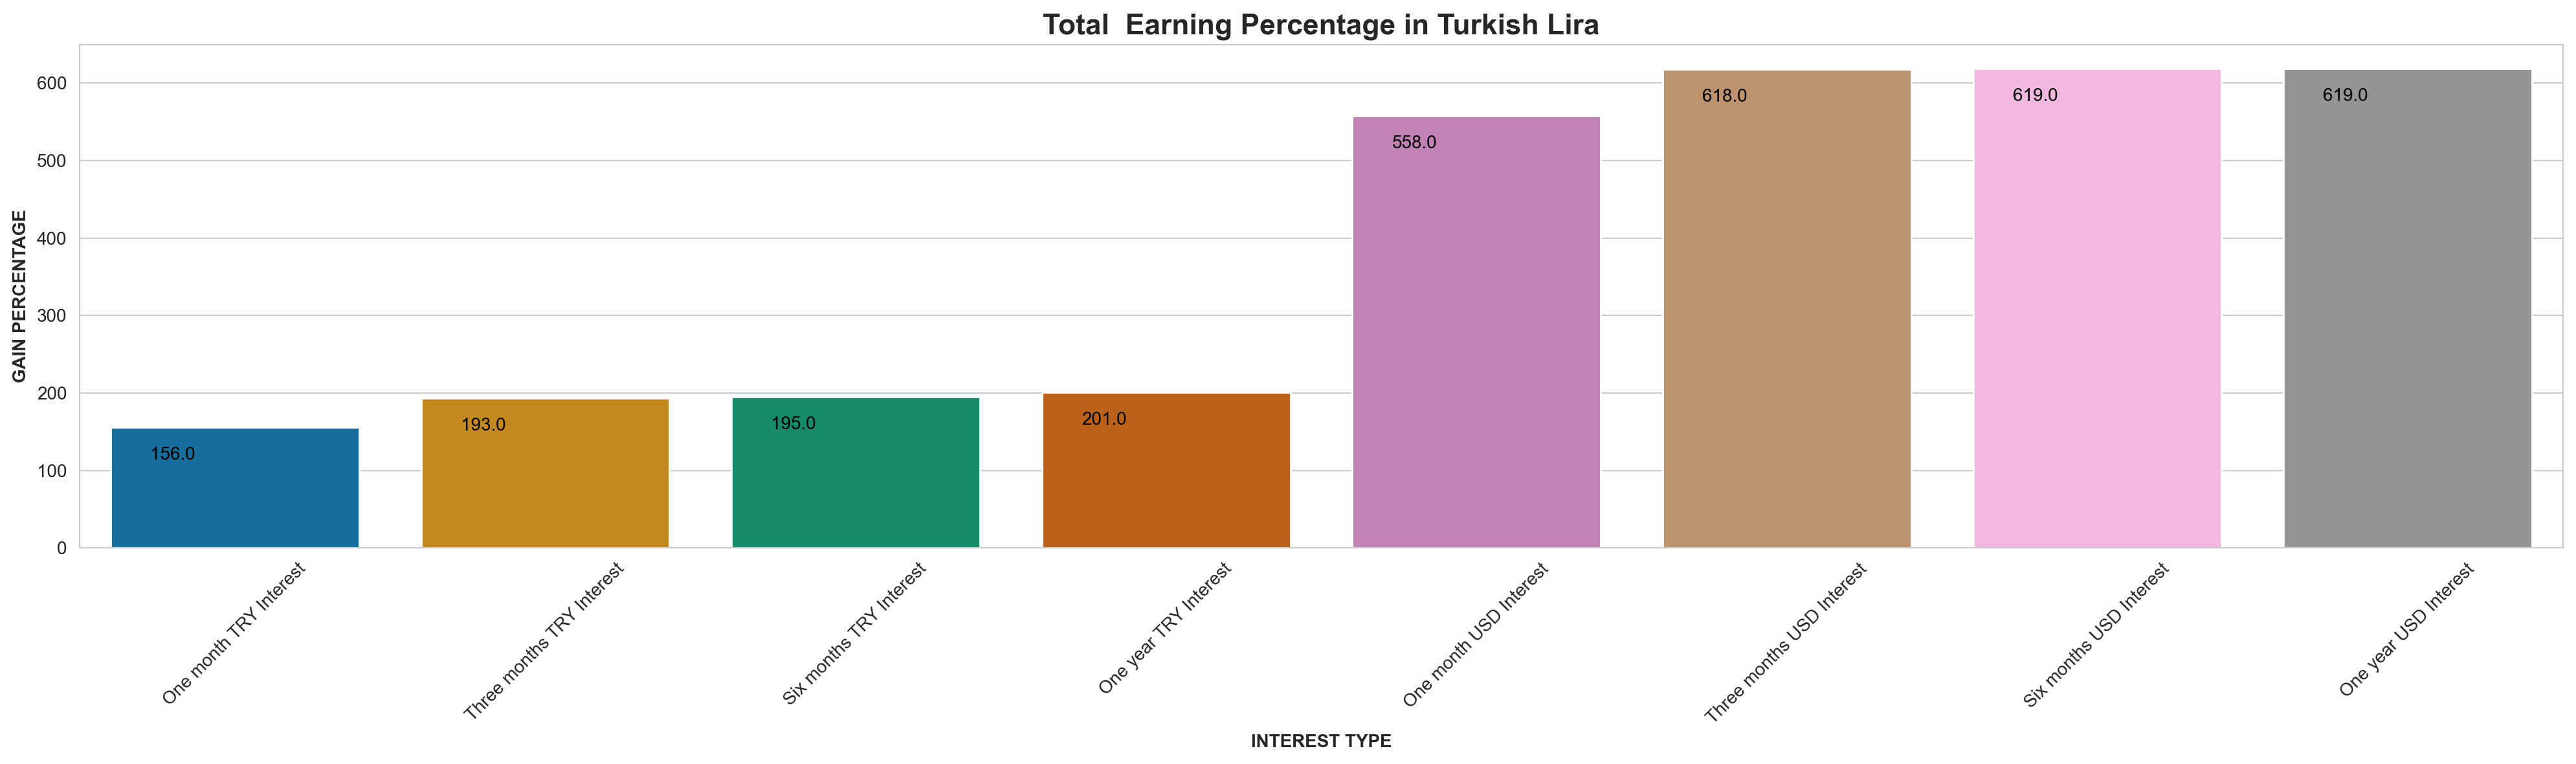

In [70]:
types = summary_df.index
plt.figure(figsize=(20,6),dpi=200)
ax = sns.barplot(data=summary_df,x=types,y='Total Earning % in TRY',palette="colorblind")
plt.title('Total  Earning Percentage in Turkish Lira',weight='bold',fontsize=16)    
plt.xlabel('INTEREST TYPE',weight='bold')
plt.ylabel('GAIN PERCENTAGE',weight='bold')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=10)

plt.tight_layout()
#plt.savefig("ttl_earning_percentage_tl.jpeg",dpi=200)
plt.show()

### Total Earning % in USD

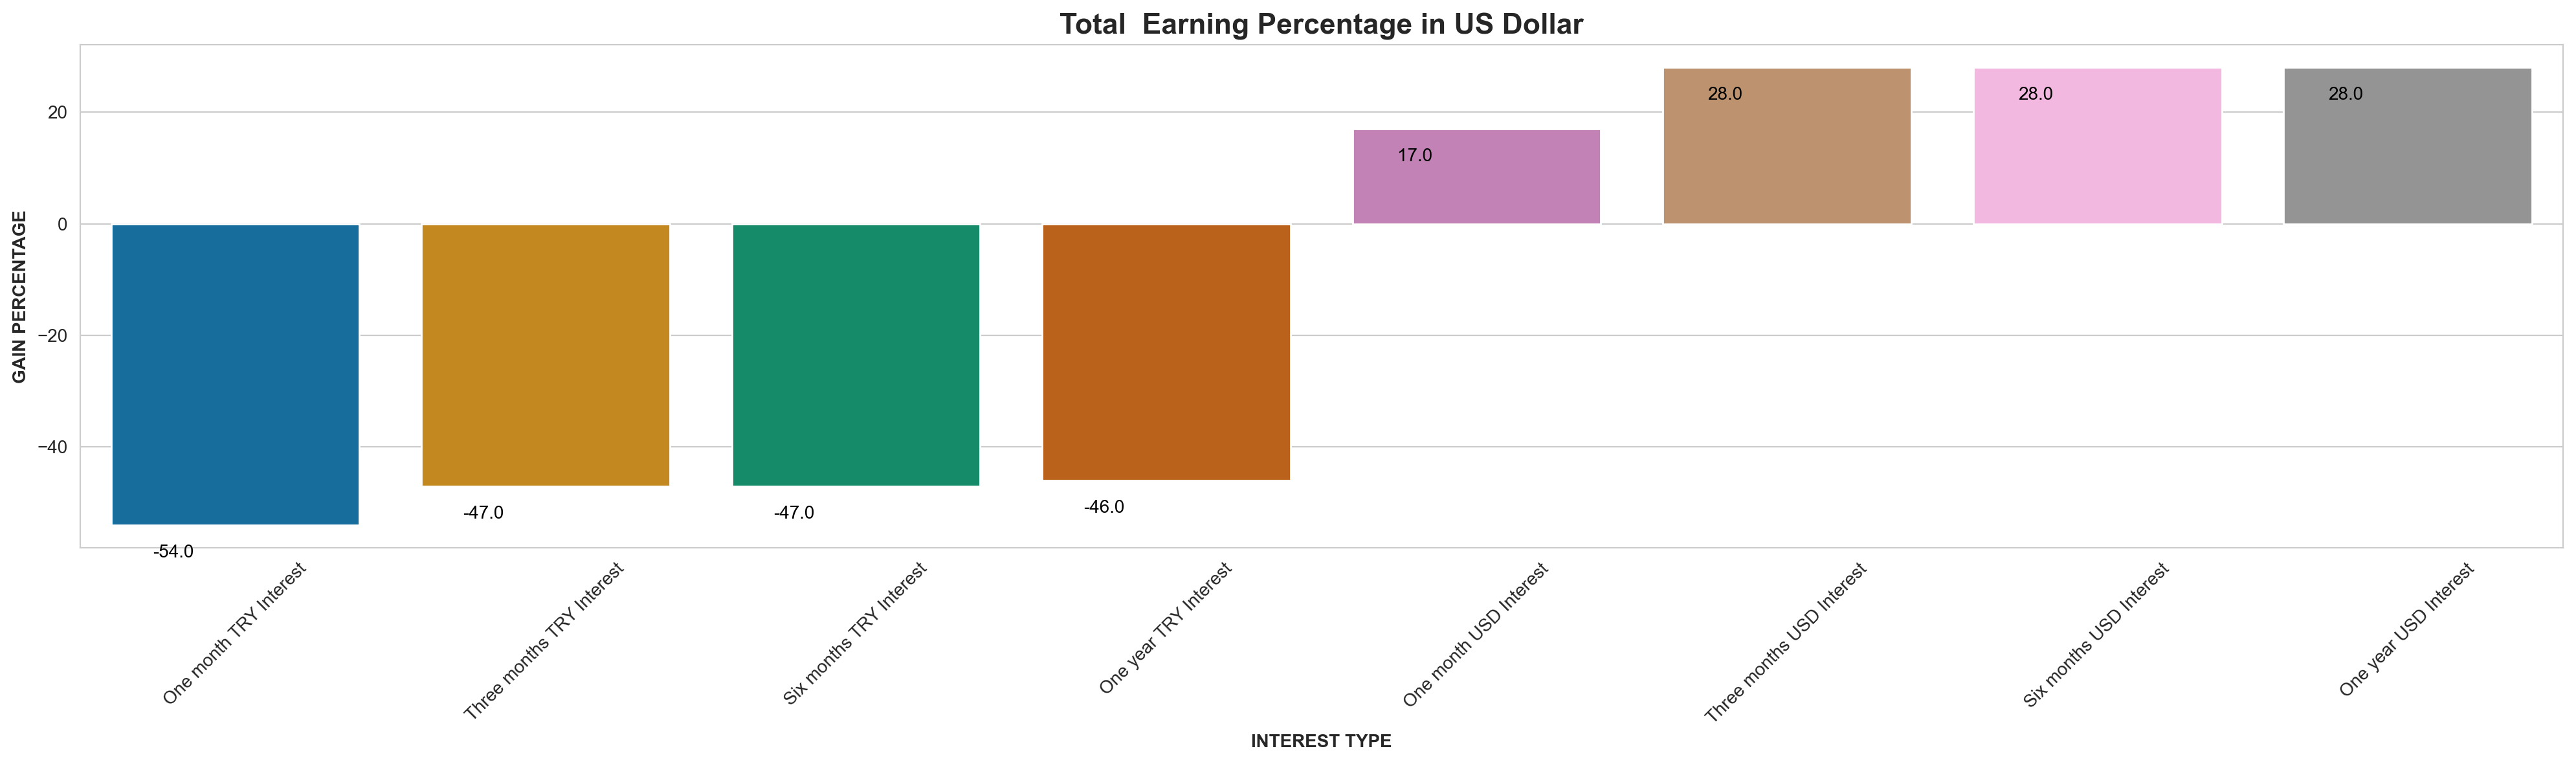

In [71]:
types = summary_df.index
plt.figure(figsize=(20,6),dpi=200)
ax = sns.barplot(data=summary_df,x=types,y='Total Earning % in USD',palette="colorblind")
plt.title('Total  Earning Percentage in US Dollar',weight='bold',fontsize=16)    
plt.xlabel('INTEREST TYPE',weight='bold')
plt.ylabel('GAIN PERCENTAGE',weight='bold')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=10)

plt.tight_layout()
#plt.savefig("ttl_earning_percentage_usd.jpeg",dpi=200)
plt.show()